<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Deep_Learning_Assignments/blob/main/Assignment_3/Jax_neural_network_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 layer Neural network for non-linear regression from scratch using Jax

Plotting 3d non linear cubic equation data. Weights as 1,2,3

n denotes number of input data points

d denotes dimension

x is the set random n number of points generated in d dimensions

calculating actual values of y as y_true using x, actuals weights and bias

plotting x and y

In [ ]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import plotly.graph_objects as go

In [ ]:
def plot_3d(x, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

Using jax numpy to generate 100 random data points for x and calculate y 

In [ ]:
def plot_4d(x, y, y_pred=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y.flatten(), cmap='Blues_r', label='underlying function')
    if y_pred is not None:
        ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred.flatten(), cmap='Reds_r', label='our function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()

x: (100, 3), weights: (3, 1), bias: (1,), y: (100, 1)


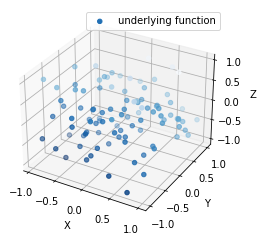

In [ ]:
n = 100
d = 3
key = random.PRNGKey(0)
x = random.uniform(key, (n, d), minval=-1, maxval=1)

weights_true = np.array([[1, 2, 3]]).T
bias_true = np.array([1])

y_true = (x ** 3) @ weights_true + (x ** 2) @ weights_true + x @ weights_true + bias_true


print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_4d(x, y_true)


Using Gradient descent and mean sum of square errors to calculate the loss and gradient, to update the weights and bias such that loss is minized

In [ ]:
class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return jnp.mean((y_pred - y_true) ** 2)
    
    def backward(self):
      n = self.y_true.shape[0]
      self.gradient = 2. * (self.y_pred - self.y_true) / n
      return self.gradient

First the weights and bias are initialized to a random value

Then calculate output by multiplying input with weights and adding bias

In backward function, the weights gradient and bias gradient are calculated based on the gradient values calculated

The weights and bias values are then updated in the update method

In [ ]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    key = random.PRNGKey(0)
    #x = random.uniform(key, (n, d), minval=-1, maxval=1)
    self.weights = random.uniform(key, (input_dim, num_hidden)) * jnp.sqrt(2. / input_dim)
    self.bias = jnp.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
from typing import Callable

def fit(x: jnp.ndarray, y: jnp.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Training with linear function

Using the linear function to train the non-linear data results in the loss being high, because the linear function is incapable of representing the this data

Epoch 0, loss 16.700050354003906
Epoch 1, loss 13.188725471496582
Epoch 2, loss 10.732563018798828
Epoch 3, loss 8.973366737365723
Epoch 4, loss 7.680229187011719
Epoch 5, loss 6.703589916229248
Epoch 6, loss 5.945964336395264
Epoch 7, loss 5.34327507019043
Epoch 8, loss 4.852946758270264
Epoch 9, loss 4.446293830871582
Epoch 10, loss 4.103658199310303
Epoch 11, loss 3.8112897872924805
Epoch 12, loss 3.559342622756958
Epoch 13, loss 3.340583086013794
Epoch 14, loss 3.1495518684387207
Epoch 15, loss 2.9820196628570557
Epoch 16, loss 2.834625482559204
Epoch 17, loss 2.704638719558716
Epoch 18, loss 2.589799404144287
Epoch 19, loss 2.488206386566162
Epoch 20, loss 2.398240089416504
Epoch 21, loss 2.318507432937622
Epoch 22, loss 2.247800588607788
Epoch 23, loss 2.1850671768188477
Epoch 24, loss 2.1293861865997314
Epoch 25, loss 2.0799481868743896
Epoch 26, loss 2.0360400676727295
Epoch 27, loss 1.9970333576202393
Epoch 28, loss 1.962372899055481
Epoch 29, loss 1.9315685033798218
Epoch 30,

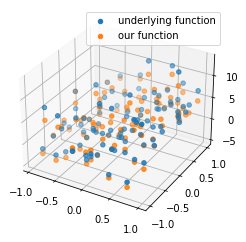

In [ ]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=100)
plot_3d(x, y_true, linear(x))

Introducing non-linearity in the neural network with a non-linear activation function - Relu. This enables the network to model complex relationships between input and output variables.

Without non-linear function, the output of each neuron would be a linear combination of the input variables - results in linear model - limitation in representing complex patterns in data

Some non-linear functions used : sigmoid, ReLU, Tanh. 
Model complex relationships between input and output variables and learn more complex patterns in data

In [ ]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = jnp.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      #to debug 
      #import pdb
      #pdb.set_trace() 
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

Performing just one step of:
- forward pass
- backward propagation

32.701992


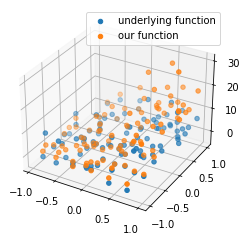

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden1, num_hidden2):
    self.linear1 = Linear(input_dim, num_hidden1)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hidden1, num_hidden2)
    self.relu2 = Relu()
    self.linear3 = Linear(num_hidden2, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d,100,40)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

Neural network for non-linear Regression

Activation function : Relu

Layers in neural network:

Input layer -> Hidden layer 1(100 neurons) -> Hidden layer 2(40 neurons) -> Output layers

Number of epochs : 1000

Epoch 0, loss 32.70199203491211
Epoch 1, loss 20.291765213012695
Epoch 2, loss 13.899297714233398
Epoch 3, loss 10.238702774047852
Epoch 4, loss 7.987026214599609
Epoch 5, loss 6.529202938079834
Epoch 6, loss 5.546807765960693
Epoch 7, loss 4.862809181213379
Epoch 8, loss 4.374001502990723
Epoch 9, loss 4.016615390777588
Epoch 10, loss 3.748140811920166
Epoch 11, loss 3.541994571685791
Epoch 12, loss 3.3802647590637207
Epoch 13, loss 3.2503483295440674
Epoch 14, loss 3.1436007022857666
Epoch 15, loss 3.0537402629852295
Epoch 16, loss 2.976471424102783
Epoch 17, loss 2.908708095550537
Epoch 18, loss 2.8480169773101807
Epoch 19, loss 2.792858839035034
Epoch 20, loss 2.7420501708984375
Epoch 21, loss 2.6947009563446045
Epoch 22, loss 2.650055170059204
Epoch 23, loss 2.607633590698242
Epoch 24, loss 2.567014694213867
Epoch 25, loss 2.5276951789855957
Epoch 26, loss 2.4897210597991943
Epoch 27, loss 2.452993154525757
Epoch 28, loss 2.417336940765381
Epoch 29, loss 2.3826894760131836
Epoch 3

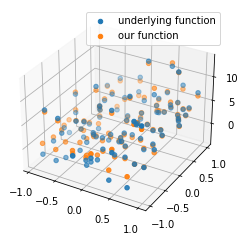

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.01, num_epochs=1000)
plot_3d(x, y_true, model(x))